In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan as Nan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from arch import arch_model
from arch.__future__ import reindexing
import math
import statsmodels.api as sm
import scipy
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm


# Procesamiento de los Fondos


In [2]:
emisoras = ['ACTICOB', 'ACTIGOB', 'ACTIMED', 'ACTIREN', 'ALTERNA', 'IMPULSA',
       'ACTI500', 'MAYA', 'ACTVIDA']

Vamos a crear una lista de tuplas, una tupla es una pareja de valores (x,y).  
(nombre del fondo, prediccion por historial de precios)  
lista_emisoras = [('ACTICOB',x1), ('ACTIGOB',x2), ('ACTIMED',x3), ('ACTIREN',x4), ('ALTERNA',x5) , ('IMPULSA',x5)
       ('ACTI500',x6), ('MAYA',x7) ('ACTVIDA',x8)]






In [3]:
emisoras = [
            ('ACTIGOB',None),
            ('ACTIMED',None), 
            ('ACTIREN',None), 
            ('ALTERNA',None),
            ('ACTVIDA',None),
            ('IMPULSA',None),
            ('MAYA',None), 
            ('ACTICOB',None),
            ('ACTI500',None) 
            ]

In [4]:
preciosB2 = pd.read_csv("precios-B2.csv",sep=',')
preciosB2

,Fecha,Emisora,Serie,Precio
0,20161201,ACTICOB,B-2,26.208114
1,20161201,ACTIGOB,B-2,3.982440
2,20161201,ACTIMED,B-2,4.409726
3,20161201,ACTIREN,B-2,7.491280
4,20161201,ALTERNA,B-2,3.342991
...,...,...,...,...
5938,20191213,MAYA,B2,31.985886
5939,20191217,MAYA,B2,32.955200
5940,20191224,MAYA,B2,32.873076
5941,20200106,MAYA,B2,33.232250



# Annualized returns 

In [5]:
def retorno_annualizado(inicio,fin):
    # En total tenemos 63 meses
    meses = 63
    
    # Calculamos el retorno total del portafolio
    retorno_total = (fin - inicio)/ inicio

    print("retorno total",retorno_total)

    # Calculamos los retornos annualizados en los meses
    retorno_annualizado = ((1 + retorno_total) ** (12/meses))-1

    print("retorno anualizado",retorno_annualizado)

    #print(retorno_annualizado[0])
    return np.round(retorno_annualizado[0],decimals=6)

In [172]:
def regresion_Lineal(emisora):
    
    print(emisora[0])
    emisora = emisora[0]
    #print(emisora)
    historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
    #print(historico.head(10).to_string())
    historico = historico.groupby(by="Fecha").sum()
    


    historico = historico.reset_index()
    
    
    train = math.floor(historico.shape[0] *.7)
    #print(train)
    #print(historico.Precio.head(train).to_string())

    y = historico.Precio.head(train).values

    x = historico.Precio.head(train).index.values
    #print(y)

    x = x.reshape((-1, 1))

   

    

    model = LinearRegression()
    model = model.fit(x, y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    test_data = []
    for i in range(train+1,historico.shape[0]):
        test_data.append(model.predict([[i]])[0])

    #print(prediction_data)
    prediction_data = test_data.copy()
    for i in range(historico.shape[0],historico.shape[0] + (365-96)):
         prediction_data.append(model.predict([[i]])[0])
    
    #print(prediction_data)
    plt.plot(historico['Precio'],label='Precio')


    plt.plot(range(train+1,historico.shape[0] + (365-96)),prediction_data,label='prediction')

    plt.plot(range(train+1,historico.shape[0]),test_data,label='test_prediction')
    

    plt.grid(True)
    plt.xlabel('Dias')
    # Set the y axis label of the current axis.
    plt.ylabel('Precio')
    # Set a title of the current axes.
    plt.title(emisora)
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()

    mod = sm.OLS(test_data,list(range(train+1,historico.shape[0])))

    fii = mod.fit()
    p_values = fii.summary()
    print(p_values)

    vect = historico.Precio.tail(historico.shape[0] - train-1).values - test_data
    return model,vect,historico.shape[0] - train-1


## Actigob

ACTIGOB
coefficient of determination: 0.995874921036246


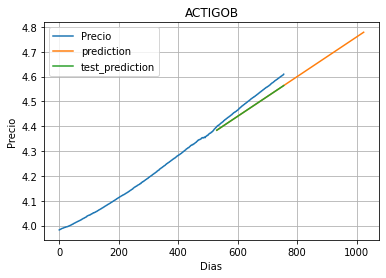

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.791e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):                   6.43e-238
Time:                        20:09:09   Log-Likelihood:                         -113.67
No. Observations:                 226   AIC:                                      229.3
Df Residuals:                     225   BIC:                                      232.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

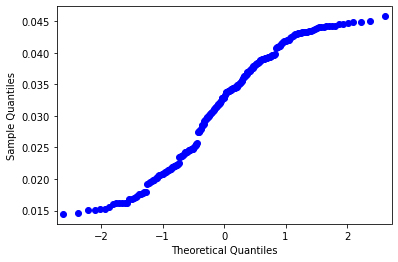

3.681825897923498

In [173]:
emisora = emisoras[0]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )

inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('prediccion inicio:', inicio, "prediccion final:", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[0] = ("ACTIGOB",ret)
print(emisora)

qqplot(vect)

plt.show()

a = list(map(lambda x: x - np.mean(vect), vect) )
a = list(map(lambda x: x / np.std(vect), vect) )

np.quantile(a,0.5)



## ACTIMED

ACTIMED
coefficient of determination: 0.9979500438049494


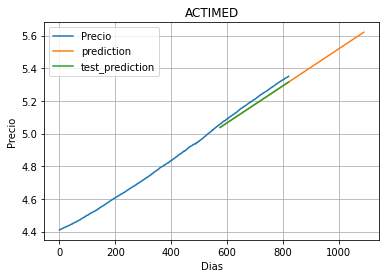

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.304e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):                   2.56e-263
Time:                        20:09:25   Log-Likelihood:                         -149.42
No. Observations:                 246   AIC:                                      300.8
Df Residuals:                     245   BIC:                                      304.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

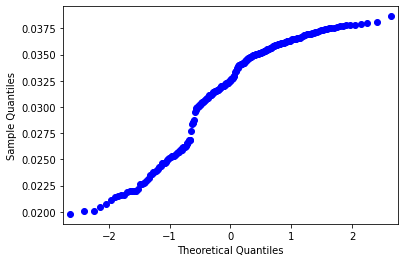

In [174]:
emisora = emisoras[1]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )

inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[1] = ("ACTIMED",ret)
qqplot(vect)
plt.show()

## ACTIREN

ACTIREN
coefficient of determination: 0.9989298762957389


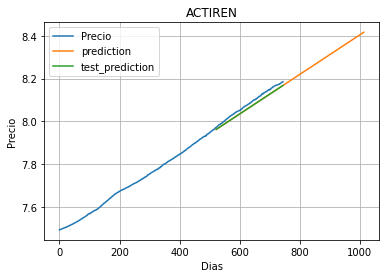

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.500e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):                   3.78e-230
Time:                        20:09:28   Log-Likelihood:                         -254.24
No. Observations:                 223   AIC:                                      510.5
Df Residuals:                     222   BIC:                                      513.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

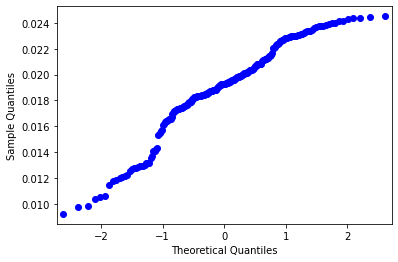

In [175]:
emisora = emisoras[2]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )
inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[2] = ("ACTIREN",ret)
qqplot(vect)
plt.show()

## ALTERNA

ALTERNA
coefficient of determination: 0.993793678687879


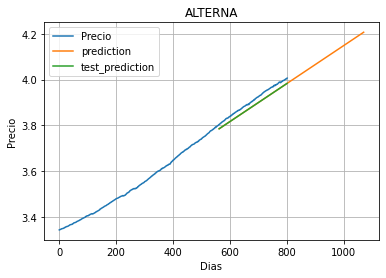

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.178e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):                   3.44e-256
Time:                        20:09:33   Log-Likelihood:                         -78.521
No. Observations:                 240   AIC:                                      159.0
Df Residuals:                     239   BIC:                                      162.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

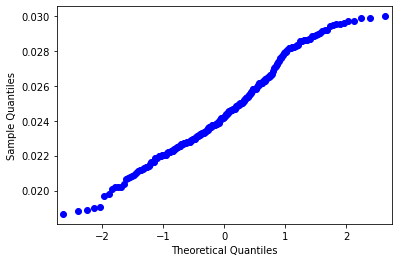

In [176]:
emisora = emisoras[3]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )

inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[3] = ("ALTERNA",ret)
qqplot(vect)
plt.show()

## ACTVIDA

ACTVIDA
coefficient of determination: 0.9948629007500309


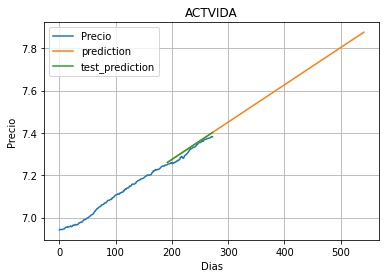

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              8844.
Date:                Fri, 21 May 2021   Prob (F-statistic):                    1.13e-83
Time:                        20:09:37   Log-Likelihood:                         -85.363
No. Observations:                  81   AIC:                                      172.7
Df Residuals:                      80   BIC:                                      175.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

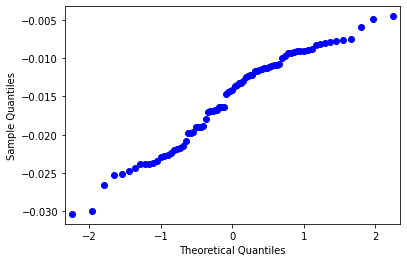

In [177]:
emisora = emisoras[4]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )

inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[4] = ("ACTVIDA",ret)
qqplot(vect)
plt.show()

## IMPULSA

IMPULSA
coefficient of determination: 0.9901613117931456


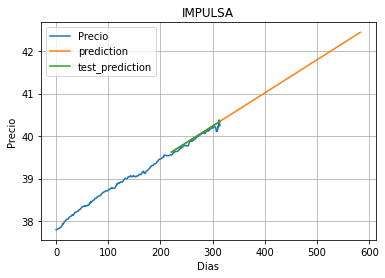

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.007e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):                    1.32e-96
Time:                        20:09:41   Log-Likelihood:                         -259.47
No. Observations:                  94   AIC:                                      520.9
Df Residuals:                      93   BIC:                                      523.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

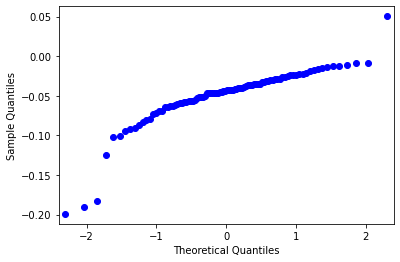

In [178]:
emisora = emisoras[5]
model1 = regresion_Lineal(emisora)
model = model1[0]
vect = model1[1]
n = model1[2]
print("Error estandar: ",math.sqrt( sum(reg)*1)/ (n -2) )

inicio = model.predict([[751]])
fin = model.predict([[751 + (365-96)]])
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[5] = ("IMPULSA",ret)
qqplot(vect)
plt.show()

## Maya


In [5]:
emisora = emisoras[6]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())



series = historico
series['Fecha'] = pd.to_datetime(historico['Fecha'],format='%Y%m%d')
series = series.set_index('Fecha')

#series.index = pd.DatetimeIndex(series.index).to_period('D')
#series

series.sort_values(by="Fecha")
#series

('MAYA', None)


,Precio
Fecha,
2016-12-01,32.029388
2016-12-02,31.722918
2016-12-05,31.549255
2016-12-06,31.691424
2016-12-07,31.711877
...,...
2020-01-07,33.063465
2020-01-08,32.832774
2020-01-09,32.944750


In [26]:
series.sample(10).values

array([[32.943221],
       [32.712333],
       [31.605222],
       [30.759296],
       [33.003517],
       [33.89194 ],
       [32.724601],
       [31.702617],
       [33.551944],
       [31.177781]])

Iteration:      1,   Func. Count:    119,   Neg. LLF: 1706.773626625195
Iteration:      2,   Func. Count:    243,   Neg. LLF: 1705.7932309477146
Iteration:      3,   Func. Count:    363,   Neg. LLF: 1645.007315821827
Iteration:      4,   Func. Count:    483,   Neg. LLF: 1589.1450236486376
Iteration:      5,   Func. Count:    603,   Neg. LLF: 1550.509505433597
Iteration:      6,   Func. Count:    723,   Neg. LLF: 1534.1352226147715
Iteration:      7,   Func. Count:    842,   Neg. LLF: 1469.2039384579211
Iteration:      8,   Func. Count:    964,   Neg. LLF: 1458.887908418847
Iteration:      9,   Func. Count: 1.08e+03,   Neg. LLF: 1452.7646524880322
Iteration:     10,   Func. Count: 1.2e+03,   Neg. LLF: 1450.6139177484042
Iteration:     11,   Func. Count: 1.32e+03,   Neg. LLF: 1447.462432284964
Iteration:     12,   Func. Count: 1.44e+03,   Neg. LLF: 1442.780930583111
Iteration:     13,   Func. Count: 1.56e+03,   Neg. LLF: 1441.5922219870986
Iteration:     14,   Func. Count: 1.68e+03,   Ne

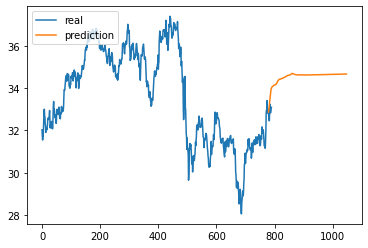

In [25]:
# create dataset
data = series
data = data.Precio.values


# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
#train, test = series_train, series_test




# define model
#model = arch_model(train, mean='HARX', vol='GARCH', p=15, q=15)


model = arch_model(train, mean='HARX', vol='GARCH', p=100, q=15)


# fit model
model_fit = model.fit()
print(model_fit)

# forecast the test set
yhat = model_fit.forecast(horizon=365-96)

# plot the actual variance

plt.plot(data,label="real")
# plot forecast variance

forecast = list(map(lambda x:x + 32.78723 - 2.8 ,yhat.variance.values[-1, :]))

print(len(forecast))
new_index = [i for i in range(779,779+len(forecast))]
forecast = pd.DataFrame(forecast,index=new_index)

plt.plot(forecast.index,forecast.values,label="prediction")
plt.legend(loc=2)
plt.show()


In [15]:
forecast

inicio = forecast[forecast.index == 791].values[0]
#print(inicio)
#
# 
# fin =[[751]])
fin = forecast[forecast.index == 1058].values[0]
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[6] = ("MAYA",ret)

predicted response: [33.27355228] , [34.96639024]
retorno total [0.05087638]
retorno anualizado [0.00949709]


## Acticob

In [16]:

emisora = emisoras[7]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())



series = historico
series['Fecha'] = pd.to_datetime(historico['Fecha'],format='%Y%m%d')
series = series.set_index('Fecha')

#series.index = pd.DatetimeIndex(series.index).to_period('D')
#series

series.sort_values(by="Fecha")
#series

('ACTICOB', None)


,Precio
Fecha,
2016-12-01,26.208114
2016-12-02,26.480729
2016-12-05,26.370676
2016-12-06,26.279367
2016-12-07,26.085753
...,...
2019-11-05,24.545196
2019-11-06,24.568560
2019-11-07,24.516503


Iteration:      1,   Func. Count:    119,   Neg. LLF: 977.8103940022933
Iteration:      2,   Func. Count:    241,   Neg. LLF: 974.5650372309974
Iteration:      3,   Func. Count:    362,   Neg. LLF: 952.2135185393015
Iteration:      4,   Func. Count:    483,   Neg. LLF: 910.9840503992364
Iteration:      5,   Func. Count:    603,   Neg. LLF: 847.6525219603183
Iteration:      6,   Func. Count:    724,   Neg. LLF: 837.9578314581328
Iteration:      7,   Func. Count:    843,   Neg. LLF: 684.4683423267903
Iteration:      8,   Func. Count:    967,   Neg. LLF: 639.7432549283197
Iteration:      9,   Func. Count: 1.09e+03,   Neg. LLF: 595.2137405898386
Iteration:     10,   Func. Count: 1.21e+03,   Neg. LLF: 588.7458008117104
Iteration:     11,   Func. Count: 1.33e+03,   Neg. LLF: 585.8761052949213
Iteration:     12,   Func. Count: 1.45e+03,   Neg. LLF: 584.0008084132912
Iteration:     13,   Func. Count: 1.57e+03,   Neg. LLF: 581.7572385302029
Iteration:     14,   Func. Count: 1.69e+03,   Neg. LLF

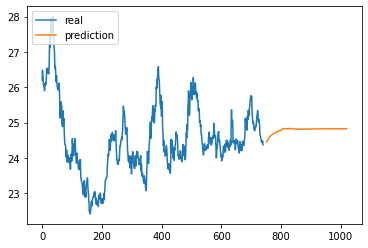

In [17]:
# create dataset
data = series
data = data.Precio.values


# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
#train, test = series_train, series_test




# define model
#model = arch_model(train, mean='HARX', vol='GARCH', p=15, q=15)


model = arch_model(train, mean='HARX', vol='GARCH', p=100, q=15)


# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=365-96)

# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(train,label="real")
# plot forecast variance
forecast = list(map(lambda x:x+24.440443 ,yhat.variance.values[-1, :]))

new_index = [i for i in range(751,751+(365-96))]
forecast = pd.DataFrame(forecast,index=new_index)

plt.plot(forecast.index,forecast.values,label="prediction")
plt.legend(loc=2)
plt.show()





In [18]:

forecast

inicio = forecast[forecast.index == 751].values[0]
#print(inicio)
#
# 
# fin =[[751]])
fin = forecast[forecast.index == 1019].values[0]
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[7] = ("ACTICOB",ret)

predicted response: [24.45776746] , [24.82558255]
retorno total [0.01503878]
retorno anualizado [0.00284725]


In [19]:
emisoras

[('ACTIGOB', 0.009354),
 ('ACTIMED', 0.011257),
 ('ACTIREN', 0.005924),
 ('ALTERNA', 0.010981),
 ('ACTVIDA', 0.010353),
 ('IMPULSA', 0.008765),
 ('MAYA', 0.009497),
 ('ACTICOB', 0.002847),
 ('ACTI500', None)]

## ACTI500

In [20]:

emisora = emisoras[8]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())



series = historico
series['Fecha'] = pd.to_datetime(historico['Fecha'],format='%Y%m%d')
series = series.set_index('Fecha')

#series.index = pd.DatetimeIndex(series.index).to_period('D')
#series

series.sort_values(by="Fecha")
#series

('ACTI500', None)


,Precio
Fecha,
2016-12-01,3.653181
2016-12-02,3.676530
2016-12-05,3.662114
2016-12-06,3.670524
2016-12-07,3.655933
...,...
2019-08-20,4.590445
2019-08-21,4.534157
2019-08-22,4.562370


Iteration:      1,   Func. Count:     74,   Neg. LLF: 165.06791034806548
Iteration:      2,   Func. Count:    153,   Neg. LLF: 153.02485434074757
Iteration:      3,   Func. Count:    228,   Neg. LLF: 125.17634392050319
Iteration:      4,   Func. Count:    302,   Neg. LLF: 68.89611249613611
Iteration:      5,   Func. Count:    381,   Neg. LLF: -62.14021841085486
Iteration:      6,   Func. Count:    456,   Neg. LLF: -82.06287642475229
Iteration:      7,   Func. Count:    531,   Neg. LLF: -98.77230092221106
Iteration:      8,   Func. Count:    606,   Neg. LLF: -100.3404729651183
Iteration:      9,   Func. Count:    680,   Neg. LLF: -105.31200177419618
Iteration:     10,   Func. Count:    755,   Neg. LLF: -105.86993432726982
Iteration:     11,   Func. Count:    830,   Neg. LLF: -107.79783060450487
Iteration:     12,   Func. Count:    905,   Neg. LLF: -108.88544210782561
Iteration:     13,   Func. Count:    980,   Neg. LLF: -109.39393605109802
Iteration:     14,   Func. Count: 1.06e+03,   N

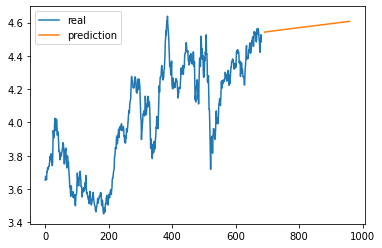

In [21]:
# create dataset
data = series
data = data.Precio.values


# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
#train, test = series_train, series_test


model = arch_model(train, mean='ARX', vol='GARCH', p=50, q=20)


# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=365-96)

# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(train,label="real")
# plot forecast variance
forecast = list(map(lambda x:x+4.485313 ,yhat.variance.values[-1, :]))

new_index = [i for i in range(691,691+(365-96))]
forecast = pd.DataFrame(forecast,index=new_index)

plt.plot(forecast.index,forecast.values,label="prediction")
plt.legend(loc=2)
plt.show()


In [22]:
forecast

inicio = forecast[forecast.index == 691].values[0]
#print(inicio)
#
# 
# fin =[[751]])
fin = forecast[forecast.index == 959].values[0]
print('predicted response:', inicio, ",", fin)


ret = retorno_annualizado(inicio,fin)
emisoras[8] = ("ACTI500",ret)

predicted response: [4.54199918] , [4.60736374]
retorno total [0.01439114]
retorno anualizado [0.00272534]


# Rendimiento de protafolio recomendado

In [23]:
recomendados_csv = pd.read_csv("portafolio_recomendado.csv") 
recomendados_csv


,Activo,Porcentaje,Rendimiento Potencial,Nivel
0,Actigob,100,5.75,1
1,actigob,90,5.75,2
2,Acticob,10,2.21,2
3,Actigob,65,5.75,3
4,Actimed,15,6.00,3
5,Acticob,4,2.21,3
6,Acti500,16,9.42,3


In [24]:
portafolio_niveles = [
            ('NIVEL 1',None),
            ('NIVEL 2',None),
            ('NIVEL 3',None)
            ]
            

In [25]:
portafolio_niveles[0] = ('NIVEL 1',emisoras[0][1])
portafolio_niveles[1] = ('NIVEL 2',np.average([emisoras[0][1], emisoras[7][1]], weights=[90,10]))
portafolio_niveles[2] = ('NIVEL 3',np.average([emisoras[0][1], emisoras[1][1], emisoras[7][1], emisoras[8][1]], weights=[65,15,4,16]))
portafolio_niveles


[('NIVEL 1', 0.009354),
 ('NIVEL 2', 0.008703299999999999),
 ('NIVEL 3', 0.008318529999999998)]

# Procesamiento Clientes


In [26]:
fondos = pd.read_csv("clientes.csv",sep=',')
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
41453,Repetido,97509467,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","45,010"
41454,Repetido,97509483,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","4,498"
41455,Repetido,97509608,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"
41456,Repetido,97516819,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"


In [27]:
fondos = fondos.head(20000)
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
19995,Repetido,93120632,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","4,089"
19996,Repetido,93120681,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","208,435"
19997,Repetido,93120699,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","10,002"
19998,Repetido,93120699,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","195,971"


 - Tomamos las claves unicas de cliente
    - querys
 - para c in claves crear el df de sus productos
 - Calcular rendimientos de ese portafolio

In [28]:
def detalle_parser(detalle_producto):
    if "ACTIGOB" in detalle_producto:
        return "ACTIGOB"
    if "ACTIMED" in detalle_producto:
        return "ACTIMED"
    if "ACTIREN" in detalle_producto:
        return "ACTIREN"
    if "ALTERNA" in detalle_producto:
        return "ALTERNA"
    if "ACTVIDA" in detalle_producto:
        return "ACTVIDA"
    if "IMPULSA" in detalle_producto:
        return "IMPULSA"
    if "MAYA" in detalle_producto:
        return "MAYA"
    if "ACTICOB" in detalle_producto:
        return "ACTICOB"
    if "ACTI500" in detalle_producto:
        return "ACTI500"


In [29]:
df_emisoras = pd.DataFrame(emisoras,columns=["Nombre","Valor"])
df_emisoras

,Nombre,Valor
0,ACTIGOB,0.009354
1,ACTIMED,0.011257
2,ACTIREN,0.005924
3,ALTERNA,0.010981
4,ACTVIDA,0.010353
5,IMPULSA,0.008765
6,MAYA,0.009497
7,ACTICOB,0.002847
8,ACTI500,0.002725


In [30]:
claves_unicas= fondos.CLAVE_CLIENTE.unique()
#len(claves_unicas)
output = pd.DataFrame(columns=["ID_CLIENTE","NIVEL" , "MEJOR_RENDIMIENTO"]  )

#16395
for i in range(0,16395):
    aux = fondos[fondos.CLAVE_CLIENTE == claves_unicas[i]].reset_index(drop=True)
    
    #limpamos la cadena de producto
    aux["DETALLE_PRODUCTO"] = [detalle_parser(x) for x in aux["DETALLE_PRODUCTO"]]
    #print(aux.to_string())
    
    #Eliminamos las comas
    aux['POSICION_CUENTA_FECHA_TRANS']=aux['POSICION_CUENTA_FECHA_TRANS'].str.replace(',','')

    total = sum(aux["POSICION_CUENTA_FECHA_TRANS"].astype("int"))
    #print(total)

    porcentajes = []
    productos = []

    for row in aux.itertuples(index=True, name='Pandas'):
        #print("###########")
        #print(row.DETALLE_PRODUCTO, row.POSICION_CUENTA_FECHA_TRANS)
        
        
        prod = df_emisoras[df_emisoras.Nombre == row.DETALLE_PRODUCTO].Valor.values[0]
        #print(prod)
        productos.append(prod)



        porcentajes.append( (int(row.POSICION_CUENTA_FECHA_TRANS) / total)*100 )
        #valores.append[897,]



    #print("porcentajes", porcentajes)
    #print("productos", productos)
    rendimiento_total = np.average(productos, weights=porcentajes)

    #print("rendimiento_total",rendimiento_total)
    #print("###")
    for nivel in portafolio_niveles:
        
        id_cliente = aux["CLAVE_CLIENTE"].unique()[0]
        

        if rendimiento_total < nivel[1]:

            #print("El ", nivel[0], "es mejor que el del cliente")
            output = output.append({"ID_CLIENTE":id_cliente, "NIVEL": nivel[0], "MEJOR_RENDIMIENTO": "No"}, ignore_index=True)
        else:
            #print("El cliente gana")
            output = output.append({"ID_CLIENTE":id_cliente, "NIVEL": nivel[0], "MEJOR_RENDIMIENTO": "Yes"}, ignore_index=True)
        

    aux = pd.DataFrame()



In [31]:
output

,ID_CLIENTE,NIVEL,MEJOR_RENDIMIENTO
0,90000175,NIVEL 1,No
1,90000175,NIVEL 2,No
2,90000175,NIVEL 3,No
3,90001470,NIVEL 1,No
4,90001470,NIVEL 2,No
...,...,...,...
49180,93120699,NIVEL 2,Yes
49181,93120699,NIVEL 3,Yes
49182,93120707,NIVEL 1,No
49183,93120707,NIVEL 2,No


# MEJOR_RENDIMIENTO -> QUE EL CLIENTE TIENE UN MEJOR PORTAFOLIO QUE EL DEL NIVEL X  

  
[ID_CLIENTE,   NIVEL , MEJOR_RENDIMIENTO]  
91281312, 1, YES  
91281312, 2, NO  
91281312, 3, YES  
131312321, 1, YES  
131312321, 2, NO  
131312321, 3, YES  
  
...   
565555, 1, YES  
565555, 2, YES  
565555, 3, YES  


In [33]:
output.to_csv("comparativo_niveles.csv", index = True, header=True)
